Assignment 1: Data Wrangling & Visualizations

In [0]:
link="https://colab.research.google.com/drive/1_Aeyh_vlihgXwcW_qQALH4zwbkDj4esZ"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

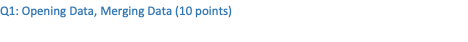

In [0]:
dfTowns = pd.read_csv('/content/drive/My Drive/OPIM 5512/Assignment 1/List_of_Towns (1).csv')

In [6]:
dfTowns.head()

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County
0,1,Andover,Town,1848,15.46,"3,303",Tolland County
1,2,Ansonia,City,1889,6.03,"19,249",New Haven County
2,3,Ashford,Town,1714,38.79,"4,100",Windham County
3,4,Avon,Town,1830,23.12,"18,098",Hartford County
4,5,Barkhamsted,Town,1779,36.22,"3,620",Litchfield County


In [7]:
dfTowns.dtypes

Number                        int64
Town                         object
Designation                  object
Established Year              int64
Land area (square miles)    float64
Population (in 2010)         object
County                       object
dtype: object

In [8]:
list(dfTowns)

['Number',
 'Town',
 'Designation',
 'Established Year',
 'Land area (square miles)',
 'Population (in 2010)',
 'County']

In [0]:
dfReal = pd.read_csv('/content/drive/My Drive/OPIM 5512/Assignment 1/Real_Estate_Sales_2014-2016 (1).csv')

In [10]:
dfReal.head()

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family


In [11]:
dfReal.dtypes

ID                   int64
SerialNumber         int64
ListYear             int64
DateRecorded        object
Town                object
Address             object
AssessedValue        int64
SaleAmount         float64
SalesRatio         float64
PropertyType        object
ResidentialType     object
dtype: object

In [12]:
list(dfReal)

['ID',
 'SerialNumber',
 'ListYear',
 'DateRecorded',
 'Town',
 'Address',
 'AssessedValue',
 'SaleAmount',
 'SalesRatio',
 'PropertyType',
 'ResidentialType']

In [0]:
MergedData = pd.merge(dfReal,dfTowns[['Town','County']], on='Town')

In [14]:
display(MergedData)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,County
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN,Tolland County
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family,Tolland County
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family,Tolland County
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family,Tolland County
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family,Tolland County
...,...,...,...,...,...,...,...,...,...,...,...,...
145982,145983,140012,2014,10/31/2014,Woodstock,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN,Windham County
145983,145984,150056,2015,1/28/2016,Woodstock,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN,Windham County
145984,145985,150057,2015,1/28/2016,Woodstock,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN,Windham County
145985,145986,140146,2014,9/21/2015,Woodstock,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN,Windham County


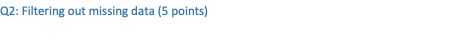

In [15]:
MergedData.isnull().sum()

ID                     0
SerialNumber           0
ListYear               0
DateRecorded           6
Town                   0
Address                2
AssessedValue          0
SaleAmount          5283
SalesRatio             0
PropertyType           0
ResidentialType    11905
County                 0
dtype: int64

In [16]:
dfTowns.isnull().sum()

Number                      0
Town                        0
Designation                 0
Established Year            0
Land area (square miles)    0
Population (in 2010)        0
County                      0
dtype: int64

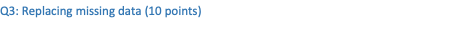

In [17]:
MergedData['DateRecorded'].fillna('1/1/2014', inplace = True)
display(MergedData['DateRecorded'])

0          9/29/2015
1          1/14/2015
2         11/30/2015
3          9/28/2015
4          8/10/2015
             ...    
145982    10/31/2014
145983     1/28/2016
145984     1/28/2016
145985     9/21/2015
145986     3/17/2015
Name: DateRecorded, Length: 145987, dtype: object

In [18]:
MergedData.isnull().sum()

ID                     0
SerialNumber           0
ListYear               0
DateRecorded           0
Town                   0
Address                2
AssessedValue          0
SaleAmount          5283
SalesRatio             0
PropertyType           0
ResidentialType    11905
County                 0
dtype: int64

In [0]:
MergedData.loc[(pd.isnull(MergedData['SaleAmount'])), 'SaleAmount'] = MergedData['AssessedValue']

In [20]:
MergedData.isnull().sum()

ID                     0
SerialNumber           0
ListYear               0
DateRecorded           0
Town                   0
Address                2
AssessedValue          0
SaleAmount             0
SalesRatio             0
PropertyType           0
ResidentialType    11905
County                 0
dtype: int64

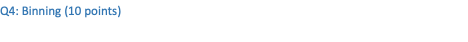

In [0]:
MergedData.loc[(MergedData['AssessedValue'] <= 300000), 'PropertyValue'] = "LowRange"
MergedData.loc[(MergedData['AssessedValue'] > 300000), 'PropertyValue'] = "MidRange"
MergedData.loc[(MergedData['AssessedValue'] > 800000), 'PropertyValue'] = "HighRange"

In [22]:
MergedData.isnull().sum()

ID                     0
SerialNumber           0
ListYear               0
DateRecorded           0
Town                   0
Address                2
AssessedValue          0
SaleAmount             0
SalesRatio             0
PropertyType           0
ResidentialType    11905
County                 0
PropertyValue          0
dtype: int64

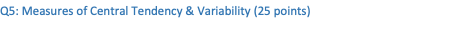

In [23]:
MergedData.describe()

,ID,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,145987.000000,1.459870e+05,145987.000000,1.459870e+05,1.459870e+05,145987.000000
mean,72994.000000,2.645845e+05,2015.001438,3.105082e+05,4.119349e+05,2.437448
std,42142.961211,1.174402e+06,0.824892,1.546245e+06,3.376906e+06,51.834706
min,1.000000,1.610000e+02,2014.000000,0.000000e+00,0.000000e+00,0.000000
25%,36497.500000,1.401250e+05,2014.000000,1.038650e+05,1.289000e+05,0.619862
50%,72994.000000,1.501020e+05,2015.000000,1.547000e+05,2.150000e+05,0.709333
75%,109490.500000,1.601300e+05,2016.000000,2.434600e+05,3.500000e+05,0.884500
max,145987.000000,1.400028e+08,2016.000000,1.389588e+08,3.955000e+08,4516.083916


In [24]:
display(MergedData)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,County,PropertyValue
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN,Tolland County,LowRange
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family,Tolland County,LowRange
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family,Tolland County,LowRange
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family,Tolland County,LowRange
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family,Tolland County,LowRange
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145982,145983,140012,2014,10/31/2014,Woodstock,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN,Windham County,LowRange
145983,145984,150056,2015,1/28/2016,Woodstock,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN,Windham County,LowRange
145984,145985,150057,2015,1/28/2016,Woodstock,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN,Windham County,LowRange
145985,145986,140146,2014,9/21/2015,Woodstock,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN,Windham County,LowRange


In [25]:
dfTowns.describe()

,Number,Established Year,Land area (square miles)
count,169.000000,169.000000,169.000000
mean,85.000000,1767.242604,28.667456
std,48.930222,70.002001,12.617779
min,1.000000,1633.000000,4.980000
25%,43.000000,1709.000000,18.850000
50%,85.000000,1785.000000,27.260000
75%,127.000000,1823.000000,36.900000
max,169.000000,1921.000000,61.590000


In [26]:
dfTowns.dtypes

Number                        int64
Town                         object
Designation                  object
Established Year              int64
Land area (square miles)    float64
Population (in 2010)         object
County                       object
dtype: object

In [27]:
display(dfTowns)

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County
0,1,Andover,Town,1848,15.46,"3,303",Tolland County
1,2,Ansonia,City,1889,6.03,"19,249",New Haven County
2,3,Ashford,Town,1714,38.79,"4,100",Windham County
3,4,Avon,Town,1830,23.12,"18,098",Hartford County
4,5,Barkhamsted,Town,1779,36.22,"3,620",Litchfield County
...,...,...,...,...,...,...,...
164,165,Windsor Locks,Town,1854,9.03,"12,498",Hartford County
165,166,Wolcott,Town,1796,20.43,"16,680",New Haven County
166,167,Woodbridge,Town,1784,18.83,"8,990",New Haven County
167,168,Woodbury,Town,1673,36.47,"9,975",Litchfield County


In [0]:
dfTowns['Population (in 2010)']=dfTowns['Population (in 2010)'].str.replace(',','').astype(float)

In [29]:
dfTowns.describe()

,Number,Established Year,Land area (square miles),Population (in 2010)
count,169.000000,169.000000,169.000000,169.000000
mean,85.000000,1767.242604,28.667456,21146.159763
std,48.930222,70.002001,12.617779,25266.953791
min,1.000000,1633.000000,4.980000,854.000000
25%,43.000000,1709.000000,18.850000,5485.000000
50%,85.000000,1785.000000,27.260000,12683.000000
75%,127.000000,1823.000000,36.900000,25709.000000
max,169.000000,1921.000000,61.590000,144229.000000


In [30]:
MergedData.describe()

,ID,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,145987.000000,1.459870e+05,145987.000000,1.459870e+05,1.459870e+05,145987.000000
mean,72994.000000,2.645845e+05,2015.001438,3.105082e+05,4.119349e+05,2.437448
std,42142.961211,1.174402e+06,0.824892,1.546245e+06,3.376906e+06,51.834706
min,1.000000,1.610000e+02,2014.000000,0.000000e+00,0.000000e+00,0.000000
25%,36497.500000,1.401250e+05,2014.000000,1.038650e+05,1.289000e+05,0.619862
50%,72994.000000,1.501020e+05,2015.000000,1.547000e+05,2.150000e+05,0.709333
75%,109490.500000,1.601300e+05,2016.000000,2.434600e+05,3.500000e+05,0.884500
max,145987.000000,1.400028e+08,2016.000000,1.389588e+08,3.955000e+08,4516.083916


In [31]:
MergedData[['ID','SerialNumber','ListYear','AssessedValue','SaleAmount','SalesRatio']].agg(['mean','median','std','min','max'])

,ID,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
mean,72994.000000,2.645845e+05,2015.001438,3.105082e+05,4.119349e+05,2.437448
median,72994.000000,1.501020e+05,2015.000000,1.547000e+05,2.150000e+05,0.709333
std,42142.961211,1.174402e+06,0.824892,1.546245e+06,3.376906e+06,51.834706
min,1.000000,1.610000e+02,2014.000000,0.000000e+00,0.000000e+00,0.000000
max,145987.000000,1.400028e+08,2016.000000,1.389588e+08,3.955000e+08,4516.083916


In [32]:
dfTowns[['Number','Established Year','Land area (square miles)','Population (in 2010)']].agg(['mean','median','std','min','max'])

,Number,Established Year,Land area (square miles),Population (in 2010)
mean,85.000000,1767.242604,28.667456,21146.159763
median,85.000000,1785.000000,27.260000,12683.000000
std,48.930222,70.002001,12.617779,25266.953791
min,1.000000,1633.000000,4.980000,854.000000
max,169.000000,1921.000000,61.590000,144229.000000


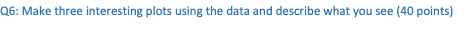

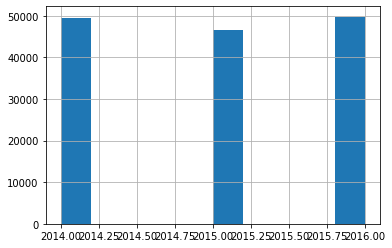

In [33]:
MergedData['ListYear'].hist()

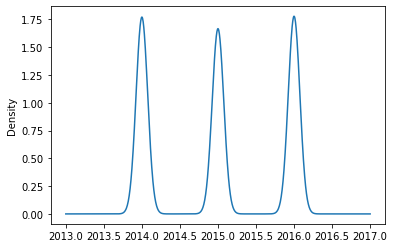

In [34]:
MergedData['ListYear'].plot.kde()

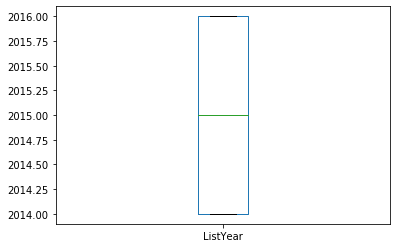

In [35]:
MergedData['ListYear'].plot.box()

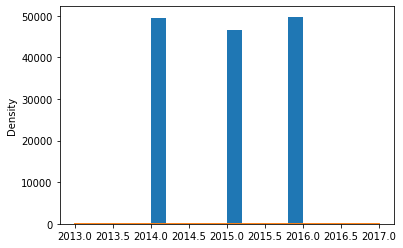

In [36]:
MergedData['ListYear'].plot.hist()
MergedData['ListYear'].plot.kde()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

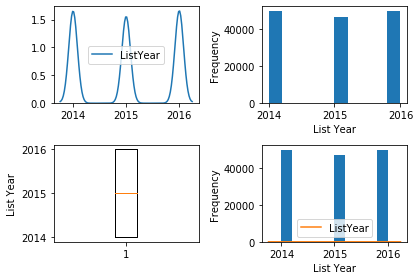

In [38]:
fig, axes = plt.subplots(2,2)

sns.kdeplot(MergedData.ListYear, 
            ax=axes[0,0])

axes[0,1].hist(MergedData.ListYear)
axes[0,1].set_xlabel("List Year")
axes[0,1].set_ylabel("Frequency")

axes[1,0].boxplot(MergedData.ListYear)
axes[1,0].set_ylabel("List Year")

axes[1,1].hist(MergedData.ListYear)
axes[1,1].set_xlabel("List Year")
axes[1,1].set_ylabel("Frequency")
sns.kdeplot(MergedData.ListYear, 
            ax=axes[1,1])
# add a tight layout
fig.tight_layout()
# show the plot
plt.show()

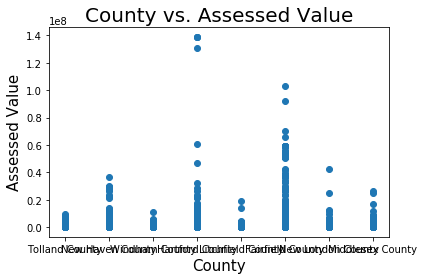

In [39]:
fig, ax = plt.subplots()
ax.scatter(x=MergedData.County, y=MergedData.AssessedValue)
ax.set_xlabel("County", fontsize=15)
ax.set_ylabel("Assessed Value", fontsize=15)
ax.set_title("County vs. Assessed Value", fontsize=20)

fig.tight_layout()
# show the plot
plt.show()

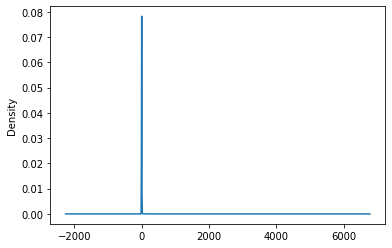

In [40]:
MergedData['SalesRatio'].plot.kde()

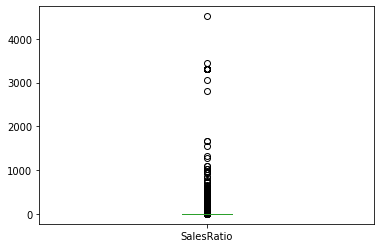

In [41]:
MergedData['SalesRatio'].plot.box()

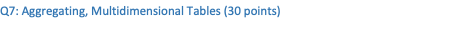

In [42]:
display(MergedData)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,County,PropertyValue
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN,Tolland County,LowRange
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family,Tolland County,LowRange
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family,Tolland County,LowRange
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family,Tolland County,LowRange
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family,Tolland County,LowRange
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145982,145983,140012,2014,10/31/2014,Woodstock,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN,Windham County,LowRange
145983,145984,150056,2015,1/28/2016,Woodstock,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN,Windham County,LowRange
145984,145985,150057,2015,1/28/2016,Woodstock,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN,Windham County,LowRange
145985,145986,140146,2014,9/21/2015,Woodstock,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN,Windham County,LowRange


In [43]:
fqt1 = pd.crosstab(MergedData['Town'], columns='count')

display(fqt1)

col_0,count
Town,
Andover,97
Ansonia,844
Ashford,137
Avon,1224
Barkhamsted,163
...,...
Windsor Locks,689
Wolcott,800
Woodbridge,307


In [44]:
MergedData[['County','Town']].groupby(['County']).agg(['count'])

,Town
,count
County,
Fairfield County,38494
Hartford County,36118
Litchfield County,9543
Middlesex County,7870
New Haven County,31791
New London County,11742
Tolland County,4932
Windham County,5497


In [45]:
MergedData[['Town','ListYear']].groupby(['ListYear']).agg(['count'])

,Town
,count
ListYear,
2014,49563
2015,46651
2016,49773


In [46]:
MergedData.groupby(['PropertyValue']).agg(['count'])

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,County
,count,count,count,count,count,count,count,count,count,count,count,count
PropertyValue,,,,,,,,,,,,
HighRange,6425,6425,6425,6425,6425,6425,6425,6425,6425,6425,4260,6425
LowRange,120076,120076,120076,120076,120076,120074,120076,120076,120076,120076,112147,120076
MidRange,19486,19486,19486,19486,19486,19486,19486,19486,19486,19486,17675,19486


In [47]:
(MergedData.groupby(['PropertyValue']).agg(['count']))/(np.size(MergedData['PropertyValue']))

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,County
,count,count,count,count,count,count,count,count,count,count,count,count
PropertyValue,,,,,,,,,,,,
HighRange,0.044011,0.044011,0.044011,0.044011,0.044011,0.044011,0.044011,0.044011,0.044011,0.044011,0.029181,0.044011
LowRange,0.822512,0.822512,0.822512,0.822512,0.822512,0.822498,0.822512,0.822512,0.822512,0.822512,0.768199,0.822512
MidRange,0.133478,0.133478,0.133478,0.133478,0.133478,0.133478,0.133478,0.133478,0.133478,0.133478,0.121072,0.133478


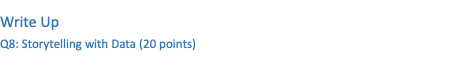

#Q6 Telling a story - In the box plot for sales ratio there clearly needs to be some data reshaping or standardization. There are such an extreme amount of outlierers. The data could also just need to be cleaned further and have these outlierers removed. The sales ratio kde also needs some work to be able to better interpert it. The scatterplot for County versus Assessed Value tells a lot. There are clearly some key counties that can be focused on if the goal is to find a property with the highest assessed values. We can also see some areas where perhaps, the values may be low now, but could provide an oppurtunity for purchasing now and selling later if the area is developing. An example of this scenario could be Stamford, where the values of properties 10 years ago were much lower but due to its rapid growth the values are increasing exponentially due to the oppurtunity brought by those looking to seek more affordable apartments outside of NYC. Cleaning the x-axis further would allow us to key out the specific counties to target. Also, this graph can be further enhanced by using Towns in place of counties. This would allow us to find high value towns within high value counties, which could be of importance to customers as properties with higher values generally have better crime statistics due to this high barrier cost of entry into a neighborhood.

Q8 - The data shows that most properties, about 82%, fall within the low range value in our Property Value column created. This signals that in a town with higher value compared to others, there may be one incredibly highly priced property surrounded by low property values. It can also signal that there are certain towns where the property values are all high, but these towns are very rare in the market. There is not much difference in the list years of the properties, signalling growth in the real-estate market has not had any major occurences like a stock market crash or mass exodus in the state. The average list year is 2015, which again is expected from the last sentence. The average town size is about 28 square miles and the average population is about 21,000 people. This signals the market is on the smaller side. There are 169 towns in total. Very few of the towns have a high population. The majority of towns were established long ago around the 1760s, on average. This is a signal that some histroic houses are for sure going to be in the market. This could drive down property values due to the regulations and laws that histpric houses can have, preventing improvement through investment. The newest town is from 1921, so the state itself is established. This signals that there has not been much growth in new areas of the state and that the areas of teh state for home and business are pretty much set in stone.